# Analyse et préparation des données pour le perceptron

In [1]:
import pandas as pd # data exploration
import numpy as np # data exploration
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns #data visualisation
import os # data visualisation (file path)
from matplotlib import style # data visualisation
import matplotlib.gridspec as gridspec # data visualisation
import scipy.stats as stats # data visualisation
from imblearn.under_sampling import RandomUnderSampler # Handling Imbalance
from sklearn.linear_model import LogisticRegression  # For the features selection
from sklearn.feature_selection import SequentialFeatureSelector # For the features selection
from sklearn.model_selection import cross_val_score # For the features selection
from sklearn.metrics import r2_score # For the features selection
from sklearn.model_selection import train_test_split # For the features selection
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             recall_score, 
                             precision_score, 
                             roc_curve,
                            f1_score,
                            auc,
                             confusion_matrix,
                            ConfusionMatrixDisplay,
                            RocCurveDisplay)
from sklearn.decomposition import PCA
from utility import Perceptron

## Chargé les données

In [2]:
df = pd.read_csv('bcw_data.csv')
print(f'Les données font {df.shape[0]} lignes et {df.shape[1]} colonnes')
df.head()

Les données font 569 lignes et 33 colonnes


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(f'La liste des variables: {df.columns}')

La liste des variables: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
# Enlevé les variables qui ne sont pas utiles
df = df.drop('id', axis = 1)
df = df.drop('Unnamed: 32', axis = 1)

## Exploration des données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Vérification des valeurs manquantes

In [7]:
print(f'Il y a {df.isnull().sum().sum()} valeurs manquantes dans le dataset')

Il y a 0 valeurs manquantes dans le dataset


### Verification des dublons

In [8]:
print(f' Il y a {df.duplicated().sum()} de valeurs en doublon')

 Il y a 0 de valeurs en doublon


Le dataset ne nécessite pas de préparation pour l'exploration

## Analyse des données

Text(0.5, 1.0, 'Correlation Map between all the variables')

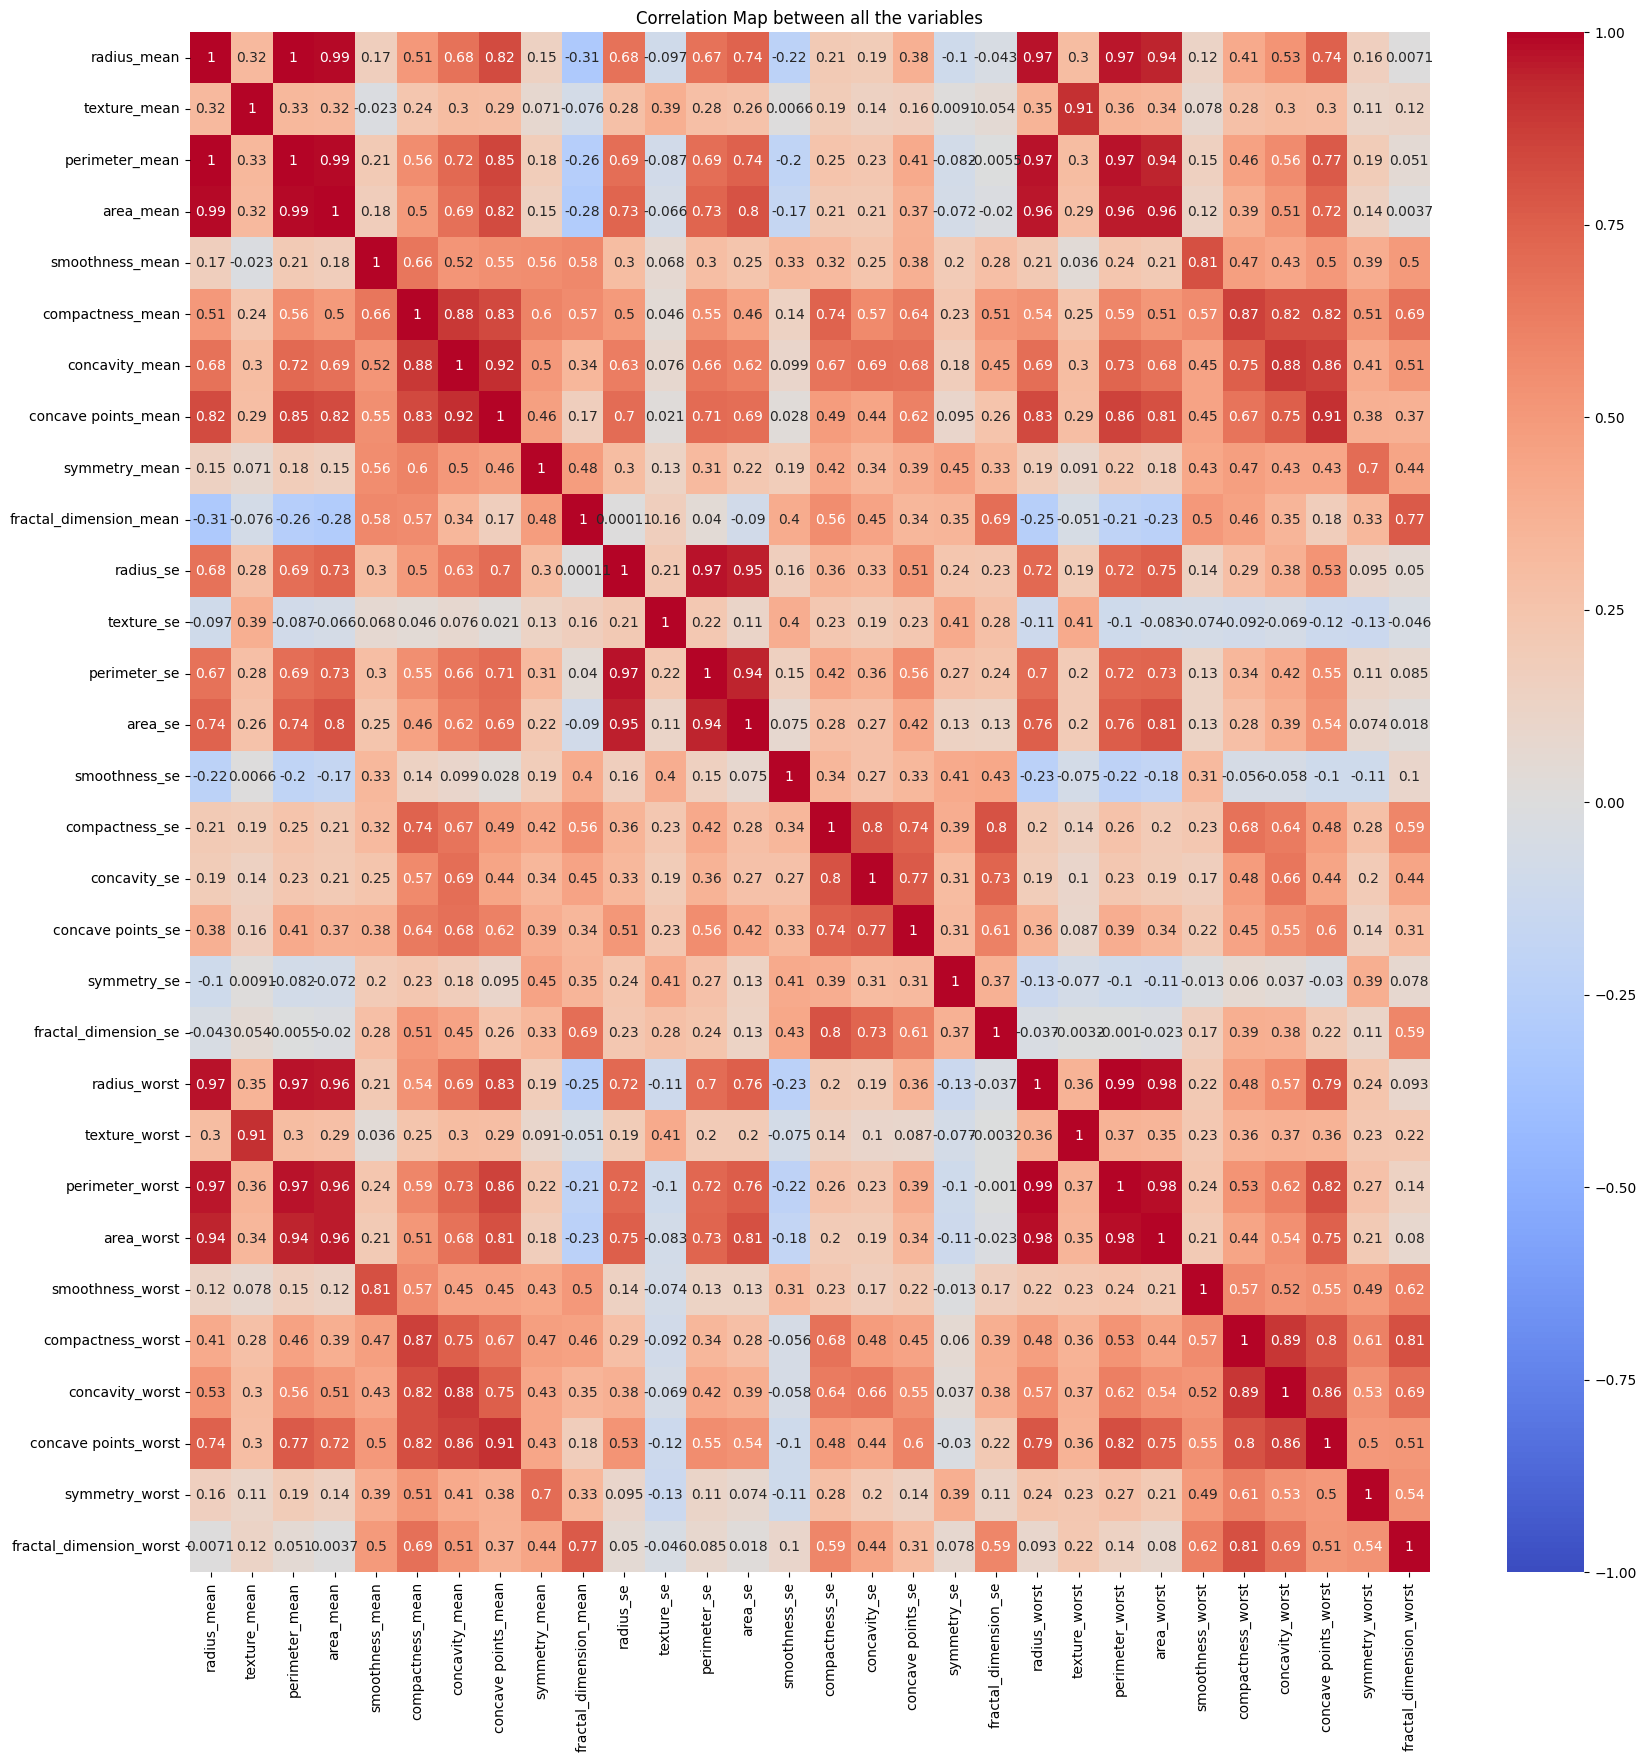

In [9]:
# Taking the resuslt column as the target column 
y = df.pop('diagnosis')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map between all the variables')
# plt.savefig('figures/Correlation Map between all the variables.png')

On peut voir que périmètre, surface et rayon sont corrélés entre eux. On peut alors enlever deux tout en gardant la pertinance de l'analyse. Dans ce cas, on a enlever périmètre et la surface.

On commence avec 30 variables
On est maintenant à 24 colonnes dans le dataset


Text(0.5, 1.0, 'Correlation Map without area and perimeter columns')

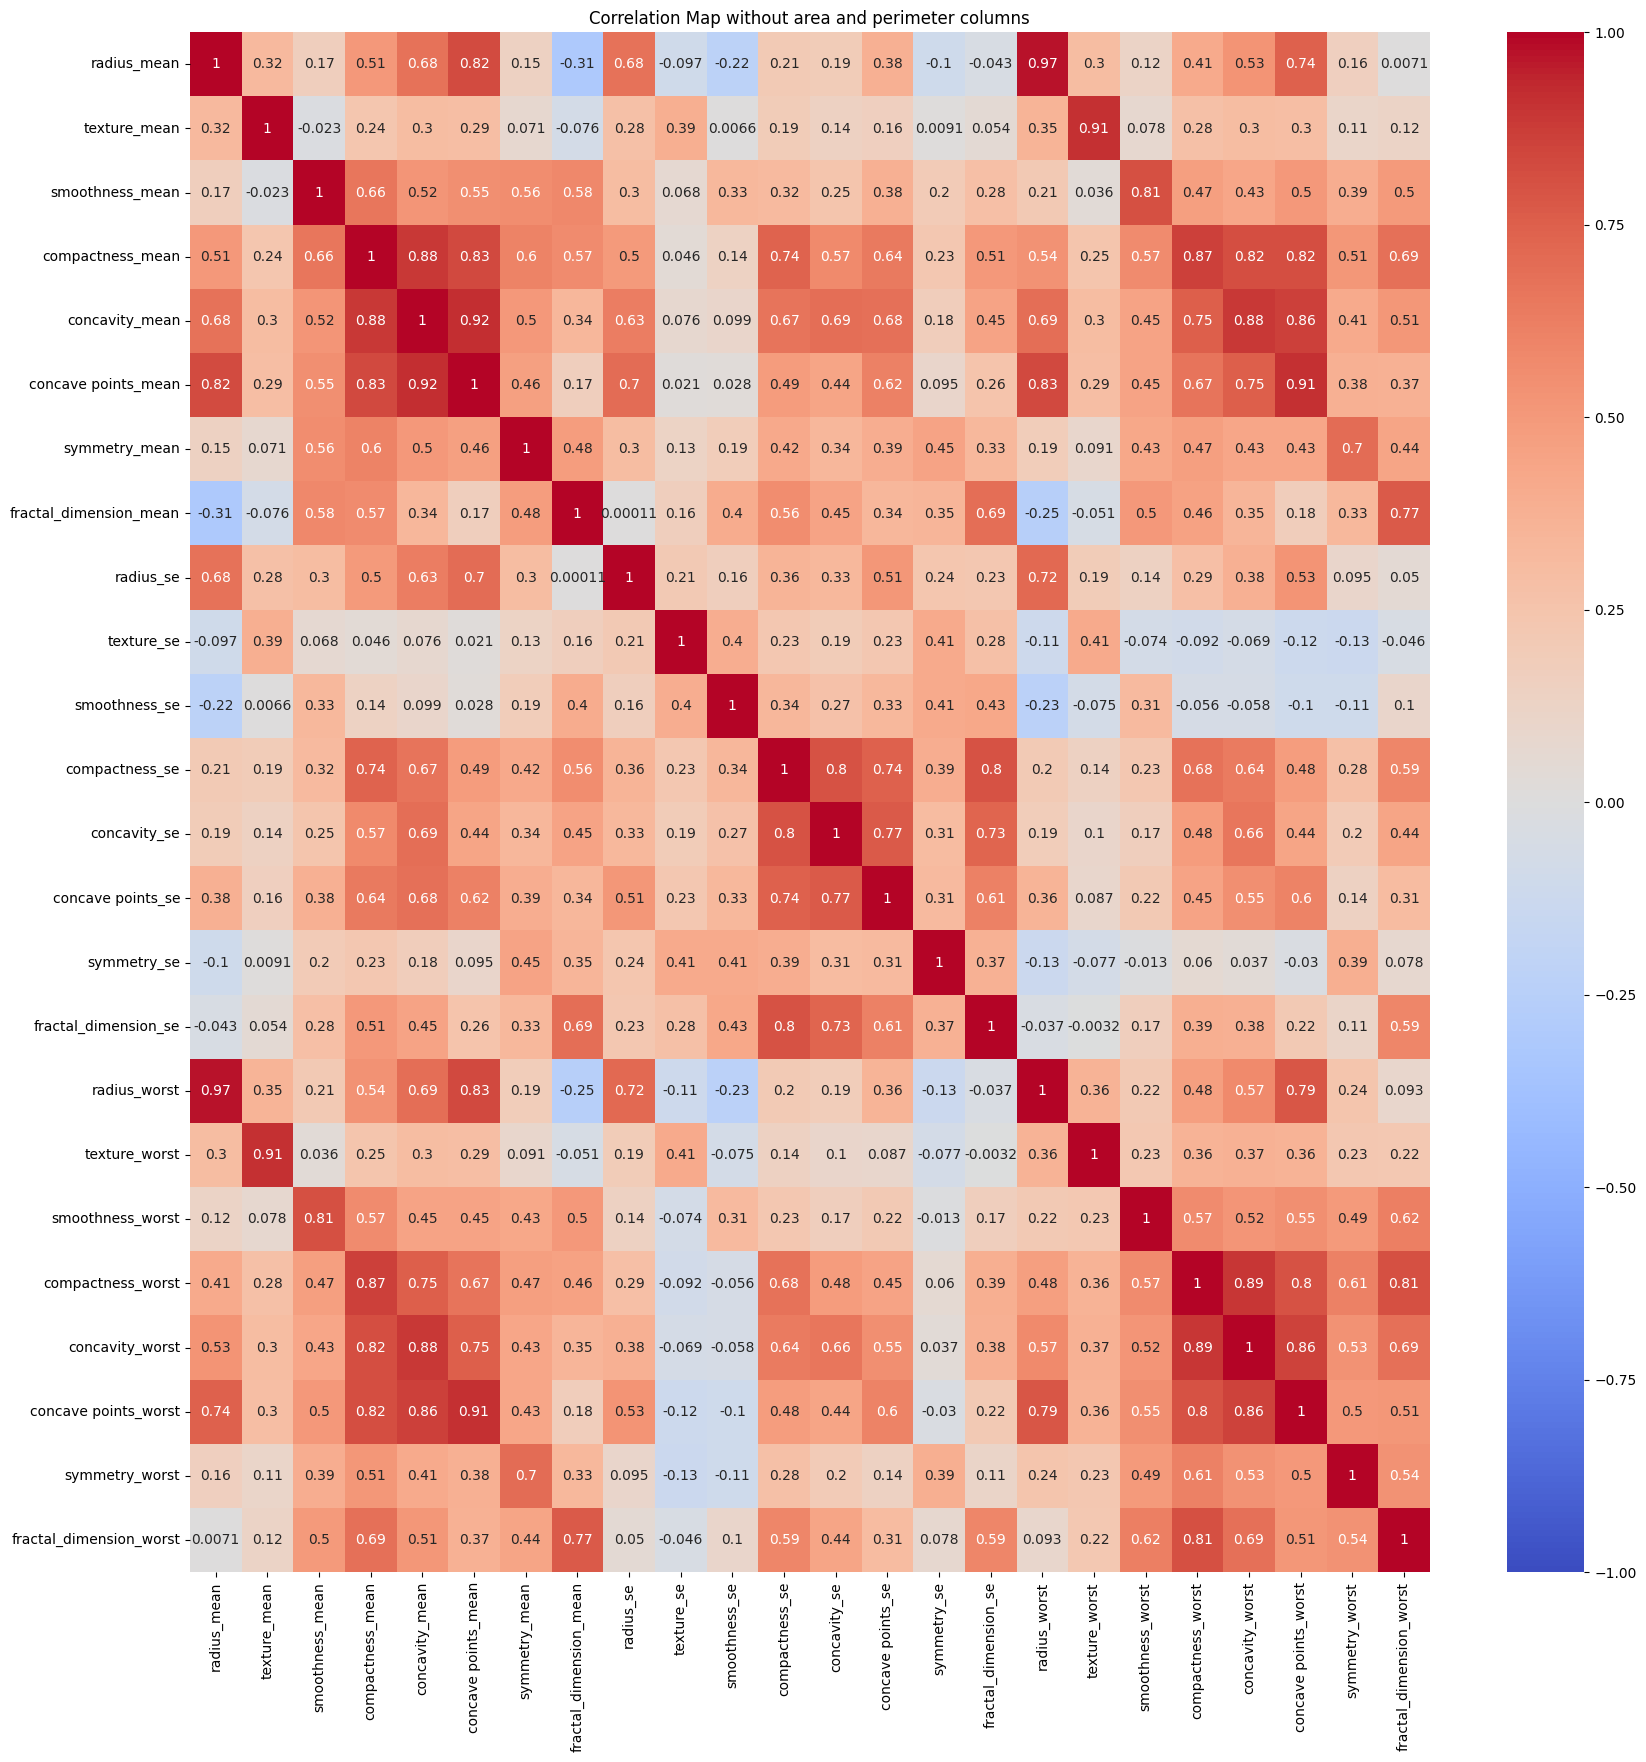

In [10]:
# Removing the perimeters and areas variables
print(f'On commence avec {len(df.columns)} variables')
df = df.drop(columns=['area_mean', 'area_se', 'area_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst'])
print(f'On est maintenant à {len(df.columns)} colonnes dans le dataset')

# The correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map without area and perimeter columns')
# plt.savefig('figures/Correlation Map without area and perimeter columns.png')

In [11]:
df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Visualisation of the target**

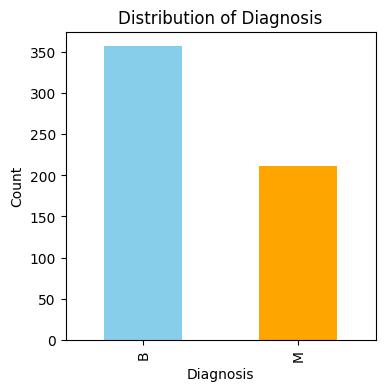

In [12]:
counts = y.value_counts()
colors=['skyblue','orange']
# Plot
plt.figure(figsize=(4, 4))
counts.plot(kind='bar',color=colors)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()
#plt.savefig('figures/Target representation.png')

**Commentaire :**
La distribution des classes est déséquilibrée. Il y a plus de cas bénins que de cas malins.
Il faudrait faire une amputation de donnée


### Visualisation of the features

In [13]:
# Ensure the subfolder exists
if not os.path.exists('figures/visualizations'):
    os.makedirs('figures/visualizations')


def plotting_3_chart(df_normalized, feature):
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.histplot(df_normalized.loc[:, feature], ax=ax1, kde=True)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df_normalized.loc[:, feature], plot=ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df_normalized.loc[:, feature], orient='v', ax=ax3)

    # Save the figure
    fig.savefig(f'figures/visualizations/{feature}_visualization.png')
    plt.close(fig)

In [14]:
for i in df.columns[0:len(df.columns)]:
    plotting_3_chart(df,i)

In [15]:
# Each features histogram
# Plotting each feature's histogram individually
if not os.path.exists('figures/histograms full'):
    os.makedirs('figures/histograms full')

for feature in df.columns:
    plt.figure(figsize=(10, 6))
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend([f'N = {y.value_counts().to_dict()}'])
    plt.savefig(f'figures/histograms full/{feature}_histogram_full.png')
    plt.close()

**Global visualisation**

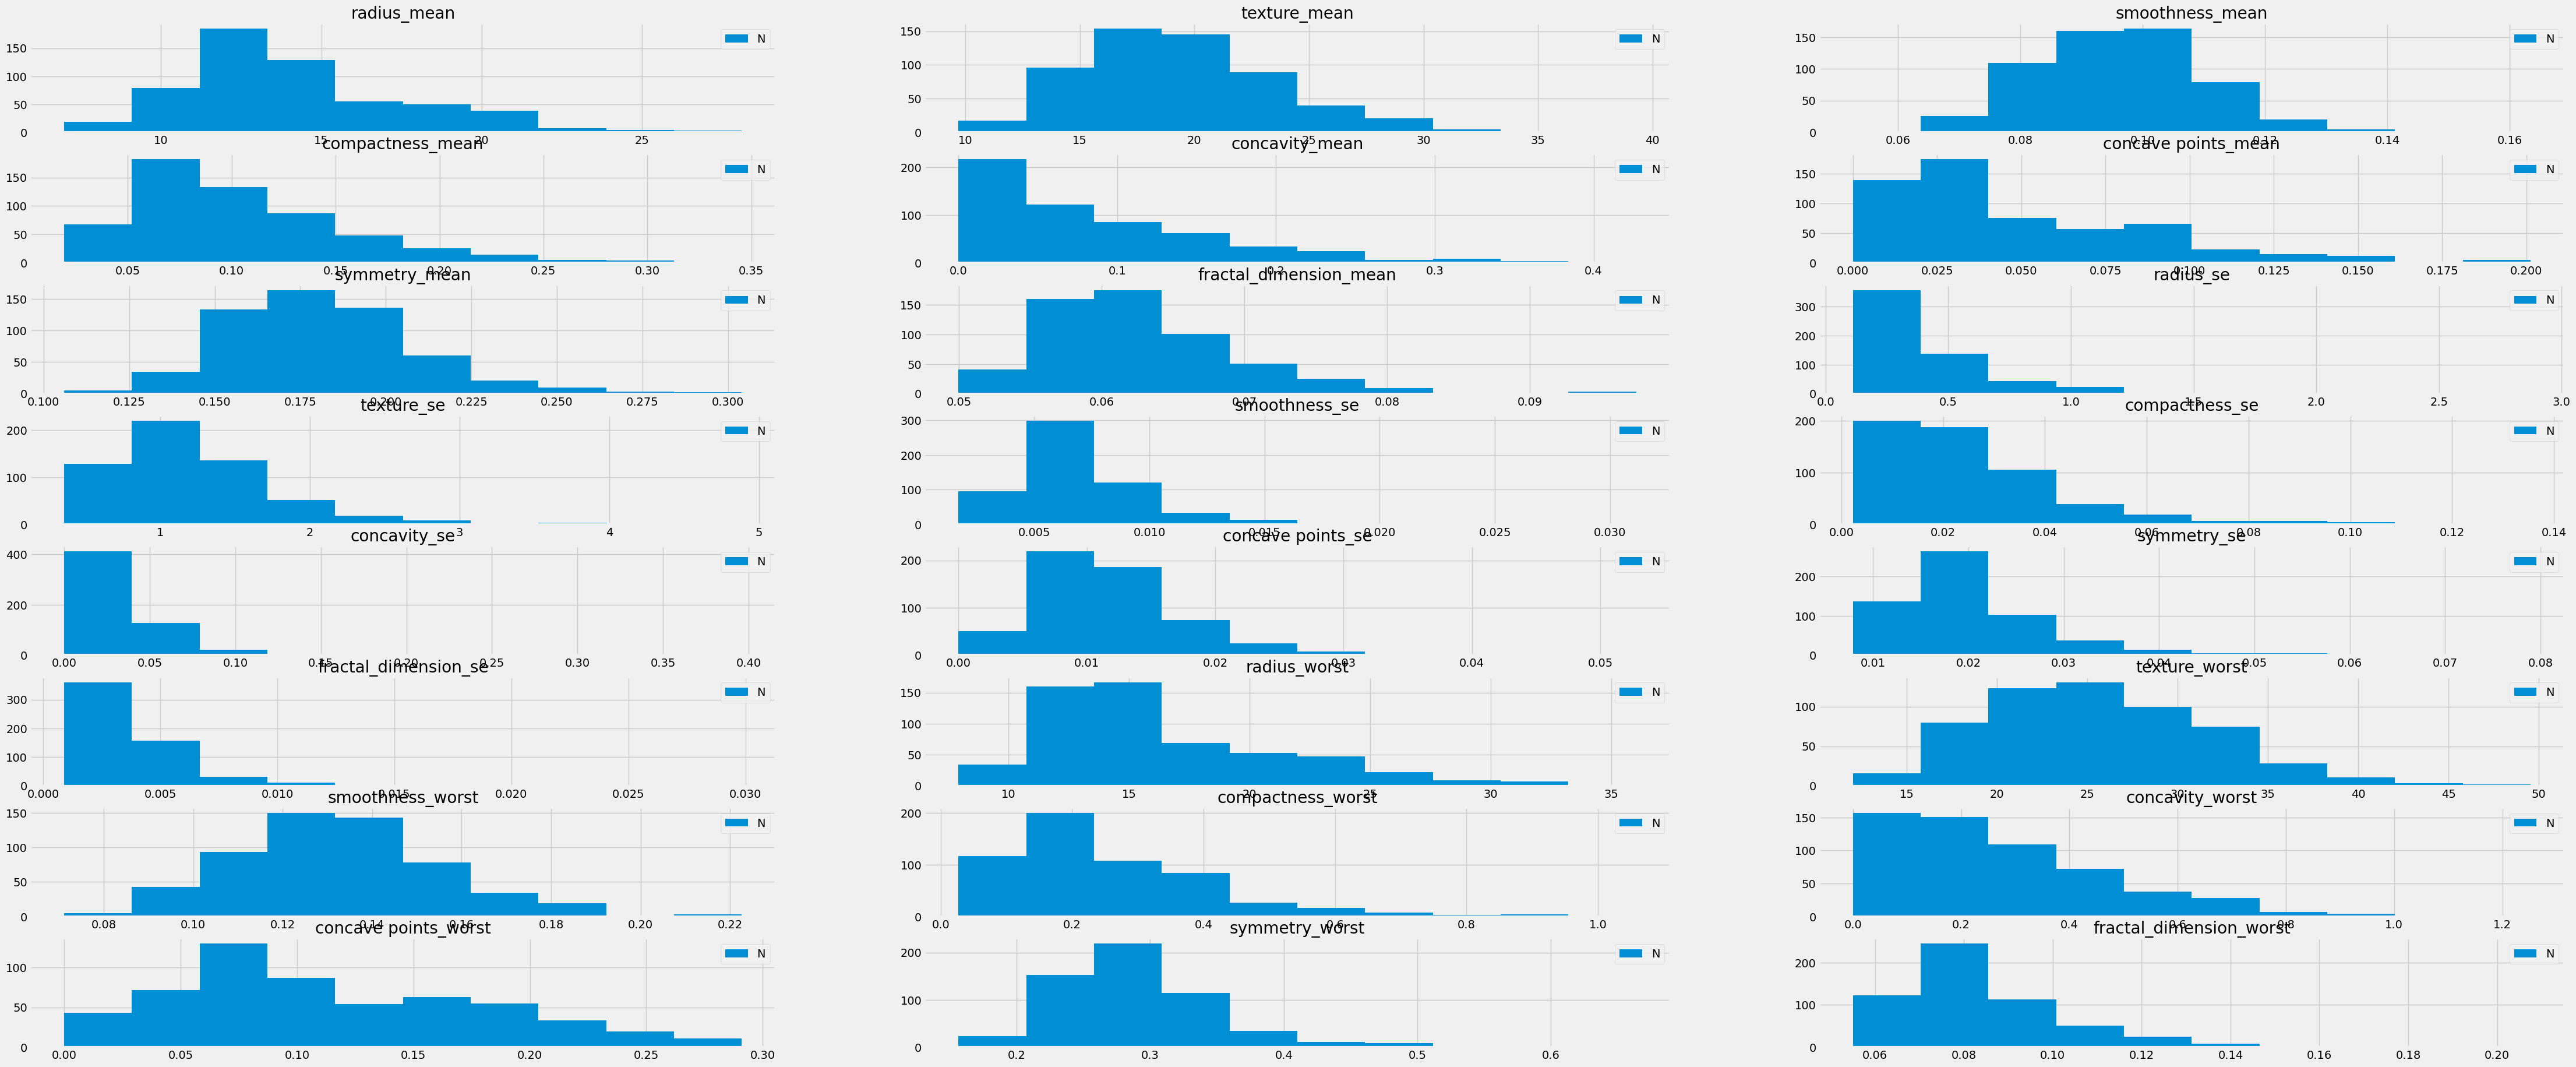

In [16]:
plt.figure(figsize=(50,30))
for i,feature in enumerate(df):
    plt.subplot(11,3,i+1)
    df[feature].hist()
    plt.legend(f'N = {y.value_counts()}')
    plt.title(feature)
    plt.savefig('figures/histograms full/full view.png')

### Adressing class imbalance

In [17]:
y.value_counts().to_frame().T

diagnosis,B,M
count,357,212


In [18]:
# Instantiate the undersampler
undersampler = RandomUnderSampler()

# Apply undersampling to your dataset
df_resampled, y_resampled = undersampler.fit_resample(df, y)

# Transforming diagnos into Boolean
y_resampled = y_resampled.map({'M': 1, 'B': 0})
y_resampled.value_counts().to_frame().T

diagnosis,0,1
count,212,212


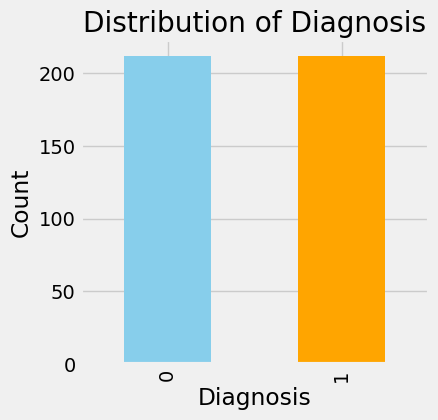

In [19]:
counts = y_resampled.value_counts()
colors=['skyblue','orange']
# Plot
plt.figure(figsize=(4, 4))
counts.plot(kind='bar',color=colors)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()
#plt.savefig('figures/Target representation.png')

In [20]:
df_resampled.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
112,14.260,19.65,0.07837,0.22330,0.300300,0.077980,0.1704,0.07769,0.3628,1.4900,...,0.02566,0.012980,15.30,23.73,0.08949,0.41930,0.67830,0.15050,0.2398,0.10820
136,11.710,16.67,0.10510,0.06095,0.035920,0.026000,0.1339,0.05945,0.4489,2.5080,...,0.01359,0.003707,13.33,25.48,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
309,13.050,13.84,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,0.3975,0.8285,...,0.01422,0.002273,14.73,17.40,0.10160,0.05847,0.01824,0.03532,0.2107,0.06580
220,13.650,13.16,0.09646,0.08711,0.038880,0.025630,0.1360,0.06344,0.2102,0.4336,...,0.01371,0.002735,15.34,16.35,0.13110,0.24740,0.17590,0.08056,0.2380,0.08718
505,9.676,13.14,0.12550,0.22040,0.118800,0.070380,0.2057,0.09575,0.2744,1.3900,...,0.02632,0.011480,10.60,18.04,0.20060,0.36630,0.29130,0.10750,0.2848,0.13640


In [21]:
# Each features histogram
# Plotting each feature's histogram individually
if not os.path.exists('figures/histograms resampled'):
    os.makedirs('figures/histograms resampled')

for feature in df_resampled.columns:
    plt.figure(figsize=(10, 6))
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend([f'N = {y.value_counts().to_dict()}'])
    plt.savefig(f'figures/histograms resampled/{feature}_histogram_resampled.png')
    plt.close()

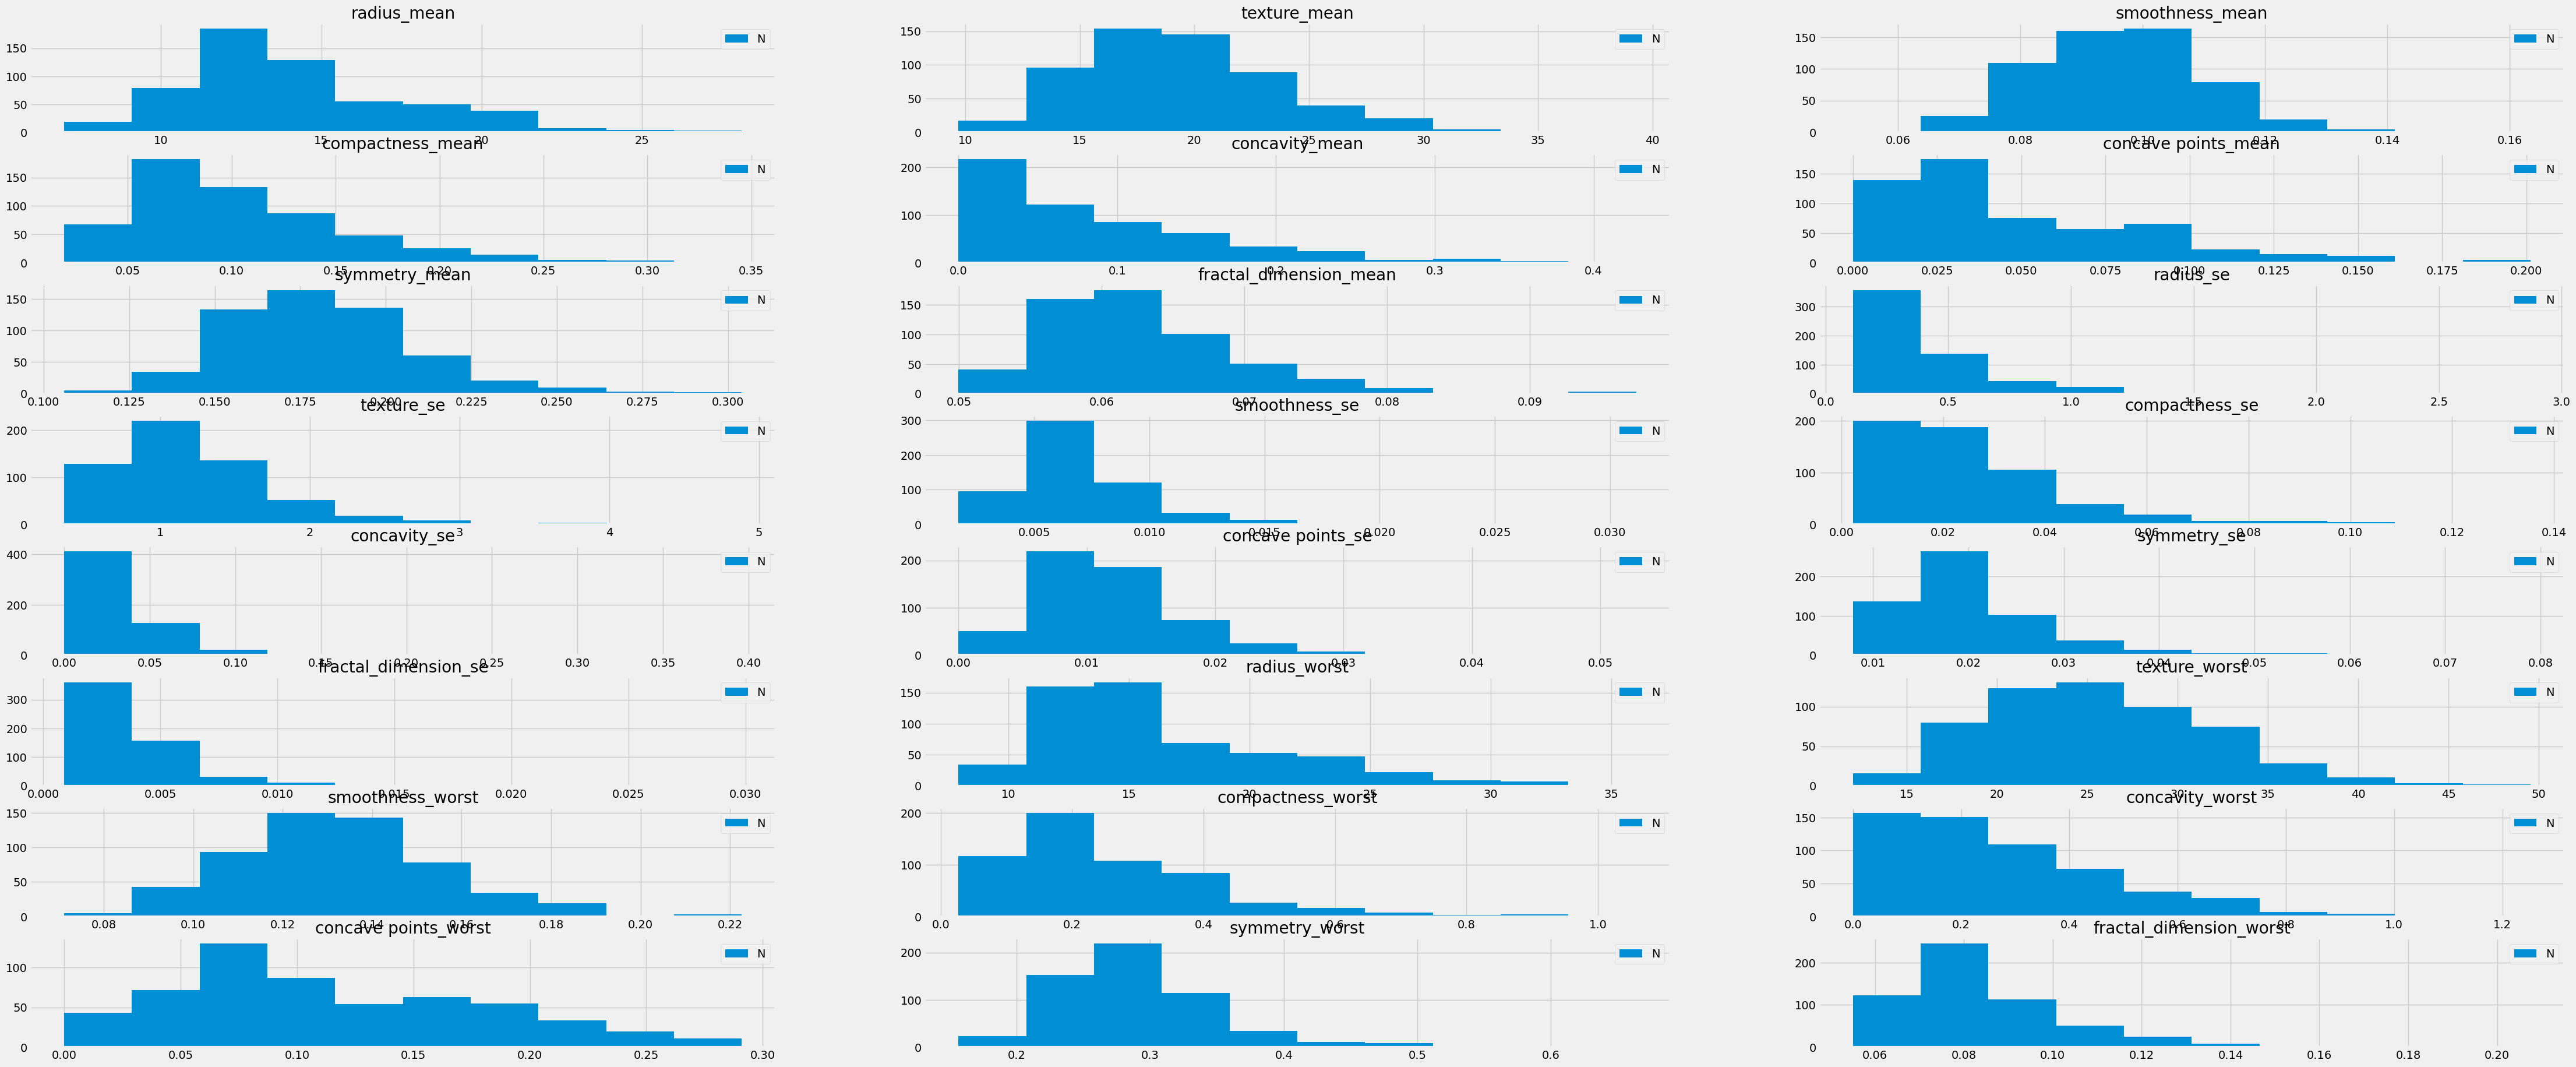

In [22]:
# For the full view
plt.figure(figsize=(50,30))
for i,feature in enumerate(df_resampled):
    plt.subplot(11,3,i+1)
    df[feature].hist()
    plt.legend(f'N = {y.value_counts()}')
    plt.title(feature)
    plt.savefig('figures/histograms resampled/full view.png')

**Comparaison du data brut et celui réduit**

In [23]:
# Ensure the subfolder exists
if not os.path.exists('figures/histograms comparison'):
    os.makedirs('figures/histograms comparison')

for feature in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Plot histogram for original dataset
    plt.hist(df[feature], bins=30, alpha=0.5, label='Original')
    
    # Plot histogram for resampled dataset
    plt.hist(df_resampled[feature], bins=30, alpha=0.5, label='Resampled')
    
    plt.title(f'Comparison of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.savefig(f'figures/histograms comparison/{feature}_comparison.png')
    plt.close()

### Analyse Bi-varié sur les data réduits

In [24]:
# Ensure the subfolder exists
if not os.path.exists('figures/comparaison cible'):
    os.makedirs('figures/comparaison cible')

# Select features to visualize
more_features_to_plot = df_resampled.columns

# Concatenate df_resampled with y_resampled
df_resampled['diagnosis'] = y_resampled

# Plot histograms for additional features
for feature in more_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_resampled, x=feature, hue='diagnosis', kde=True, palette='coolwarm', alpha=0.7)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'figures/comparaison cible/{feature}_histogram_resampled.png')
    plt.close()

## Feature selection

Il faut standardiser les données

In [25]:
# Scaling the data
df_resampled_scaled = StandardScaler().fit_transform(df_resampled)
df_resampled_scaled = pd.DataFrame(df_resampled_scaled, columns=df_resampled.columns)
df_resampled_scaled.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.141952,-0.011664,-1.335672,1.972531,2.328621,0.516454,-0.495413,1.998459,-0.271411,0.607165,...,3.508337,-0.380533,-0.425934,-1.962145,0.837061,1.723925,0.336046,-0.880301,1.166053,-1.0
1,-0.826715,-0.710474,0.518032,-0.915131,-0.791020,-0.741802,-1.823656,-0.439414,0.012089,2.679351,...,-0.048297,-0.765504,-0.140653,-0.334951,-1.044340,-0.936383,-0.844995,-1.926098,-0.619106,-1.0
2,-0.466878,-1.374109,-0.978524,-1.334895,-1.161074,-1.157453,-1.408808,-1.010122,-0.157155,-0.739349,...,-0.598304,-0.491920,-1.457835,-1.438207,-1.307855,-1.336844,-1.347105,-1.323926,-1.010845,-1.0
3,-0.305758,-1.533569,-0.081145,-0.449832,-0.756092,-0.750758,-1.747237,0.093871,-0.773875,-1.543187,...,-0.421105,-0.372716,-1.629004,-0.161891,-0.184780,-0.605758,-0.686003,-0.907742,0.086845,-1.0
4,-1.372914,-1.538259,1.932755,1.920949,0.186951,0.332484,0.789161,4.412274,-0.562484,0.403610,...,2.933016,-1.298992,-1.353504,2.845020,0.522008,-0.070636,-0.292323,-0.194282,2.613896,-1.0


#### Using forward selection

Optimal number of features: 16


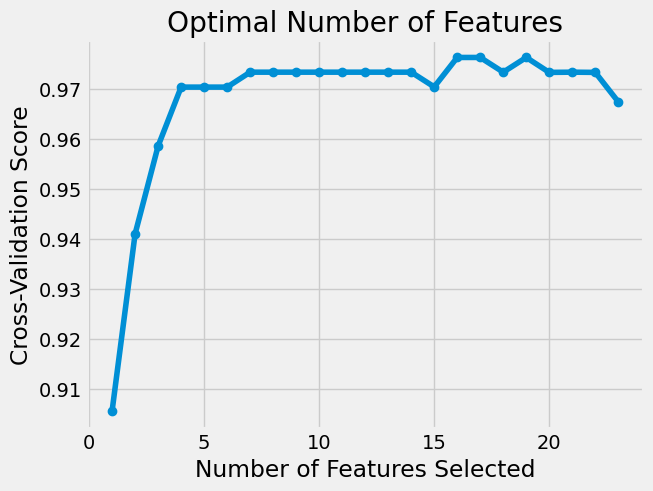

In [26]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled_scaled.drop('diagnosis', axis= 1), y_resampled, test_size=0.2, random_state=42) # The colomn diagnosis is drop from the X_train and X_test

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Track performance for each number of features
scores = []
feature_counts = list(range(1, X_train.shape[1] ))

# Loop through each possible number of features
for k in feature_counts:
    selector = SequentialFeatureSelector(clf, n_features_to_select=k, direction='forward', cv=5)
    selector.fit(X_train, y_train)
    # Evaluate model performance with cross-validation
    score = cross_val_score(clf, selector.transform(X_train), y_train, cv=5).mean()
    scores.append(score)

# Plot the results
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.title('Optimal Number of Features')
plt.savefig('figures/features selection.png')

# Find the optimal number of features
optimal_num_features = feature_counts[scores.index(max(scores))]
print("Optimal number of features:", optimal_num_features)

In [27]:
# Selecting the optimal features
selector = SequentialFeatureSelector(clf, n_features_to_select=optimal_num_features, direction='forward', cv=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

print(f'On a selectionné {optimal_num_features} features')
print("Selected features:", selected_features)

On a selectionné 16 features
Selected features: Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'concavity_se',
       'concave points_se', 'radius_worst', 'texture_worst',
       'compactness_worst', 'concavity_worst'],
      dtype='object')


In [28]:
# Save the columns related to the selected_features and the target y in a csv file
df_selected = df_resampled[selected_features].reset_index(drop=True)
df_selected['diagnosis'] = y_resampled.values
df_selected.to_csv('forward_selected_features.csv', index=False)


### Backward selection

Optimal number of features: 12


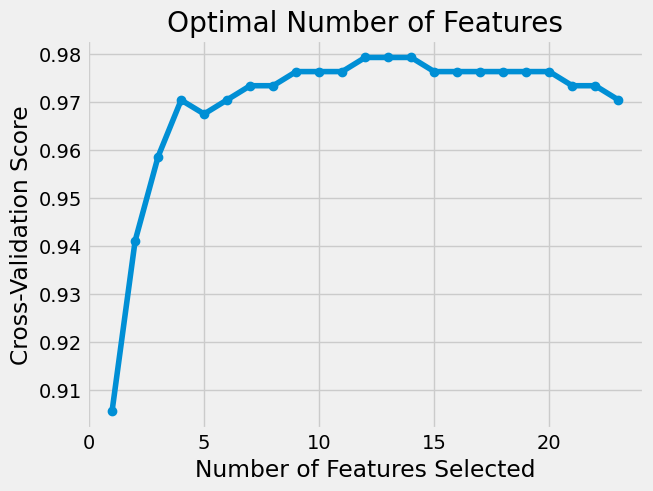

In [29]:
# Instantiate the logistic regression model
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled_scaled.drop('diagnosis', axis= 1), y_resampled, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Track performance for each number of features
scores = []
feature_counts = list(range(1, X_train.shape[1] ))

# Loop through each possible number of features
for k in feature_counts:
    selector = SequentialFeatureSelector(clf, n_features_to_select=k, direction='backward', cv=5)
    selector.fit(X_train, y_train)
    # Evaluate model performance with cross-validation
    score = cross_val_score(clf, selector.transform(X_train), y_train, cv=5).mean()
    scores.append(score)

# Plot the results
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.title('Optimal Number of Features')
plt.savefig('figures/backward features selection.png')

# Find the optimal number of features
optimal_num_features = feature_counts[scores.index(max(scores))]
print("Optimal number of features:", optimal_num_features)

In [30]:
# Saving the selected features
selector = SequentialFeatureSelector(clf, n_features_to_select=optimal_num_features, direction='backward', cv=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

print(f'On a selectionné {optimal_num_features} features')
print("Selected features:", selected_features)

On a selectionné 12 features
Selected features: Index(['concave points_mean', 'symmetry_mean', 'radius_se', 'smoothness_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


In [31]:
# Save the columns related to the selected_features and the target y in a csv file
df_selected = df_resampled[selected_features].reset_index(drop=True)
df_selected['diagnosis'] = y_resampled.values
df_selected.to_csv('backward_selected_features.csv', index=False)

# Classification sur la base des variables sélectionnées par la méthode forward

In [32]:
np.random.seed(10)

## Chargement des features sélectionnées

In [33]:
df = pd.read_csv("forward_selected_features.csv")

In [34]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

## Normalisation des données

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Création d'ensembles d'entraînement et de validation

In [36]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [37]:
X_train.shape, X_test.shape

((296, 16), (128, 16))

## Entraînement du perceptron

In [72]:
import matplotlib

In [73]:
matplotlib.style.use("default");

Iteration 20, Loss: 0.02702702702702703Converged at iteration 21; Loss: 0.006756756756756757


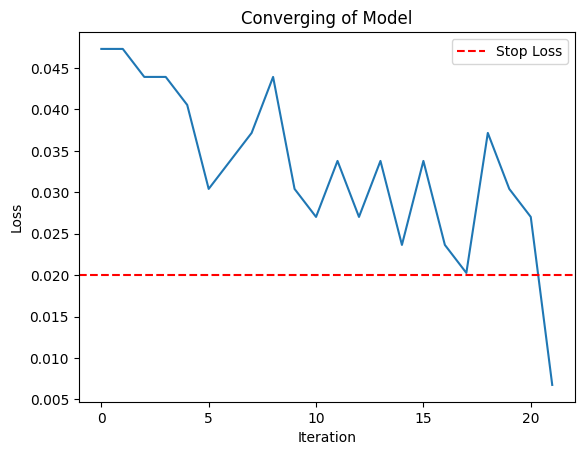

<Figure size 640x480 with 0 Axes>

In [74]:
np.random.seed(10)
perceptron = Perceptron(learning_rate=0.01,n_iter=100)
perceptron.fit(X_train,y_train)

## Evaluation du perceptron

In [75]:
y_pred=perceptron.predict(X_test)

In [76]:
print(f"Accuracy  : {round(100*accuracy_score(y_pred,y_test),2)}%")
print(f"Precision : {round(100*precision_score(y_pred,y_test),2)}%")
print(f"Recall    : {round(100*recall_score(y_pred,y_test),2)}%")
print(f"F1-Score  : {round(100*f1_score(y_pred,y_test),2)}%")

Accuracy  : 96.88%
Precision : 98.36%
Recall    : 95.24%
F1-Score  : 96.77%


## Courbe ROC et matrice de confusion

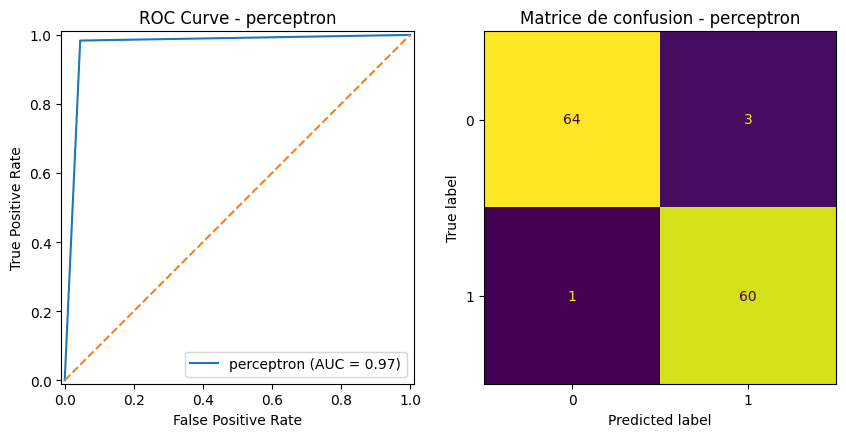

In [77]:
fpr, tpr, rc_aux = roc_curve(y_test,y_pred)
fig, ax = plt.subplots(1,2,figsize=(10,8)) 
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr,
                tpr=tpr, 
                roc_auc=roc_auc,
                estimator_name='perceptron').plot(ax=ax[0]);

ax[0].set_title(f"ROC Curve - perceptron")
ax[0].plot([0,1],[0,1],linestyle="--");

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax[1],colorbar=False)
ax[1].set_title(f"Matrice de confusion - perceptron");
plt.show()

## Visualisation des données

### Projection des individus dans plan

In [78]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
y_pred = perceptron.predict(X_scaled)

### Représentation graphique

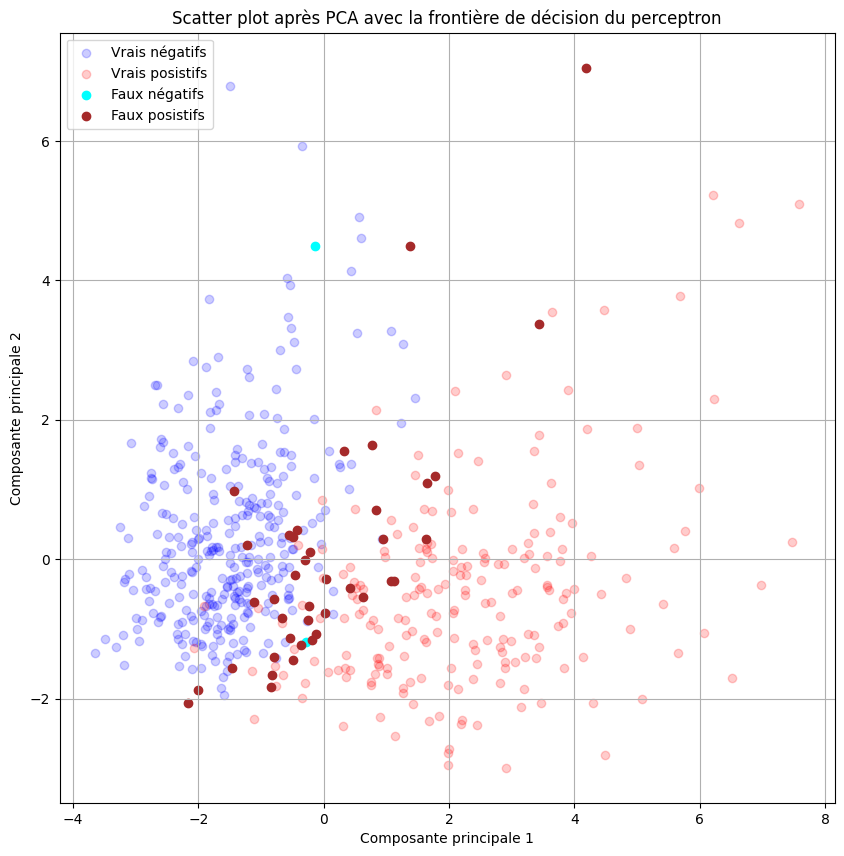

In [79]:
tn = X_reduced[np.where((y == 0) & (y_pred == 0))]
tp = X_reduced[np.where((y == 1) & (y_pred == 1))]
fn = X_reduced[np.where((y == 1) & (y_pred == 0))]
fp = X_reduced[np.where((y == 0) & (y_pred == 1))]

plt.figure(figsize=(10, 10))
plt.scatter(tn[:, 0], tn[:, 1], color='blue', label='Vrais négatifs', alpha=0.2)
plt.scatter(tp[:, 0], tp[:, 1], color='red', label='Vrais posistifs', alpha=0.2)
plt.scatter(fn[:, 0], fn[:, 1], color='cyan', label='Faux négatifs', alpha=1)
plt.scatter(fp[:, 0], fp[:, 1], color='brown', label='Faux posistifs', alpha=1)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Scatter plot après PCA avec la frontière de décision du perceptron')
plt.legend(loc='upper left')
plt.grid()
plt.show()



### Ajout de la frontière de décision

#### Calcul de la frontière

In [80]:
x_min, x_max = X_reduced[:, 0].min() - 0.1, X_reduced[:, 0].max() + 0.1
y_min, y_max = X_reduced[:, 1].min() - 0.1, X_reduced[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original = pca.inverse_transform(grid_points)

z = perceptron.predict(grid_points_original)
z = z.reshape(xx.shape)



### Représentation graphique

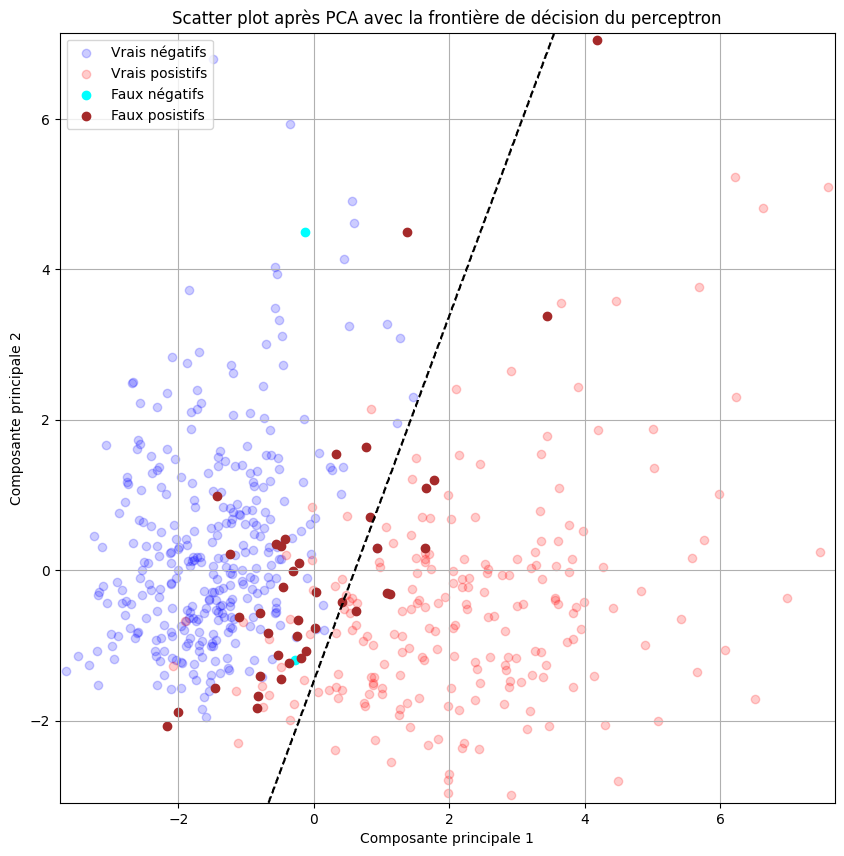

In [81]:
plt.figure(figsize=(10, 10))
plt.scatter(tn[:, 0], tn[:, 1], color='blue', label='Vrais négatifs', alpha=0.2)
plt.scatter(tp[:, 0], tp[:, 1], color='red', label='Vrais posistifs', alpha=0.2)
plt.scatter(fn[:, 0], fn[:, 1], color='cyan', label='Faux négatifs', alpha=1)
plt.scatter(fp[:, 0], fp[:, 1], color='brown', label='Faux posistifs', alpha=1)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Scatter plot après PCA avec la frontière de décision du perceptron')
plt.legend(loc='upper left')
plt.grid()
plt.contour(xx, yy, z, levels=[0], colors='k', linestyles='dashed')
plt.show()


## Application à l'ensemble des données

### Chargement des features sélectionnées

In [82]:
df = pd.read_csv("bcw_data.csv",usecols=df.columns)

In [83]:
df["diagnosis"] = df["diagnosis"].map(lambda x: 1 if x == "M" else 0)

In [84]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

### Normalisation des données

In [85]:
X_scaled = scaler.transform(X)

### Prédictions

In [86]:
y_pred = perceptron.predict(X_scaled)

### Scores sur l'ensemble des données

In [87]:
print(f"Accuracy  : {round(100*accuracy_score(y_pred,y),2)}%")
print(f"Precision : {round(100*precision_score(y_pred,y),2)}%")
print(f"Recall    : {round(100*recall_score(y_pred,y),2)}%")
print(f"F1-Score  : {round(100*f1_score(y_pred,y),2)}%")

Accuracy  : 92.62%
Precision : 99.06%
Recall    : 84.0%
F1-Score  : 90.91%


# Classification sur la base des variables sélectionnées par la méthode backward

In [88]:
np.random.seed(10)

## Chargement des features sélectionnées

In [89]:
df = pd.read_csv("backward_selected_features.csv")

In [90]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

## Normalisation des données

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Création d'ensembles d'entraînement et de validation

In [92]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [93]:
X_train.shape, X_test.shape

((296, 12), (128, 12))

## Entraînement du perceptron

Iteration 20, Loss: 0.02702702702702703Converged at iteration 21; Loss: 0.006756756756756757


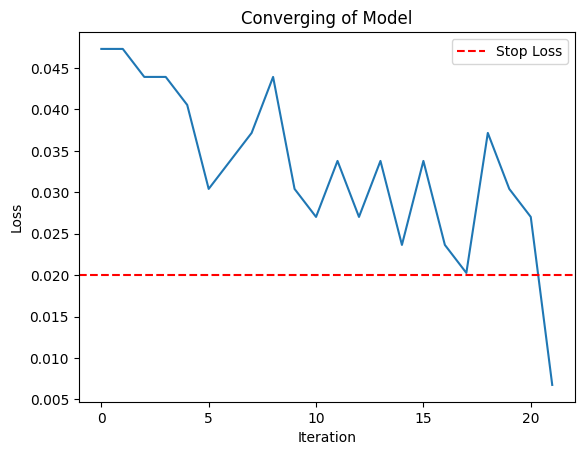

<Figure size 640x480 with 0 Axes>

In [94]:
np.random.seed(10)
perceptron = Perceptron(learning_rate=0.01,n_iter=100)
perceptron.fit(X_train,y_train)

## Evaluation du perceptron

In [95]:
y_pred=perceptron.predict(X_test)

In [96]:
print(f"Accuracy  : {round(100*accuracy_score(y_pred,y_test),2)}%")
print(f"Precision : {round(100*precision_score(y_pred,y_test),2)}%")
print(f"Recall    : {round(100*recall_score(y_pred,y_test),2)}%")
print(f"F1-Score  : {round(100*f1_score(y_pred,y_test),2)}%")

Accuracy  : 96.88%
Precision : 98.36%
Recall    : 95.24%
F1-Score  : 96.77%


## Courbe ROC et matrice de confusion

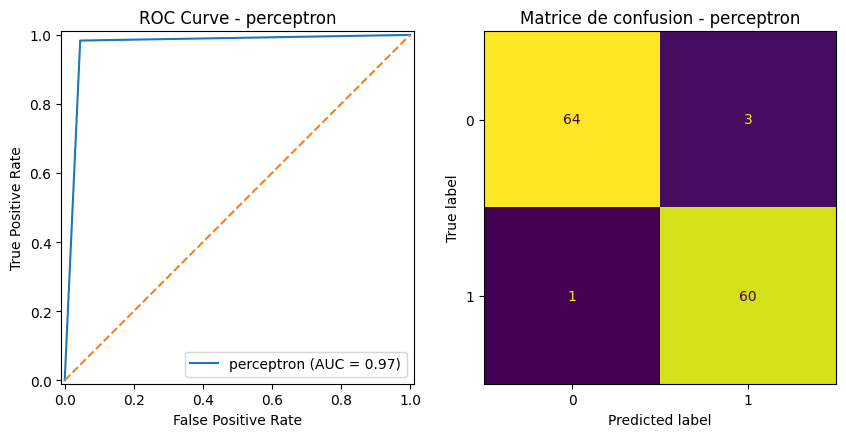

In [97]:
fpr, tpr, rc_aux = roc_curve(y_test,y_pred)
fig, ax = plt.subplots(1,2,figsize=(10,8)) 
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr,
                tpr=tpr, 
                roc_auc=roc_auc,
                estimator_name='perceptron').plot(ax=ax[0]);

ax[0].set_title(f"ROC Curve - perceptron")
ax[0].plot([0,1],[0,1],linestyle="--");

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax[1],colorbar=False)
ax[1].set_title(f"Matrice de confusion - perceptron");
plt.show()

## Visualisation des données

### Projection des individus dans plan

In [98]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
y_pred = perceptron.predict(X_scaled)

### Représentation graphique

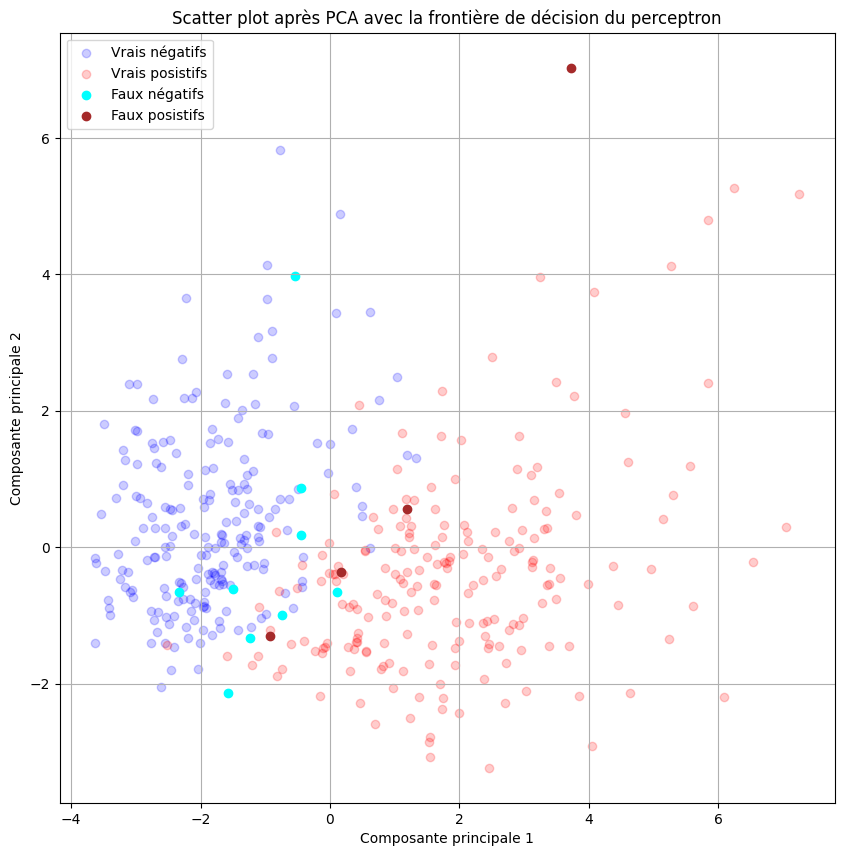

In [99]:
tn = X_reduced[np.where((y == 0) & (y_pred == 0))]
tp = X_reduced[np.where((y == 1) & (y_pred == 1))]
fn = X_reduced[np.where((y == 1) & (y_pred == 0))]
fp = X_reduced[np.where((y == 0) & (y_pred == 1))]

plt.figure(figsize=(10, 10))
plt.scatter(tn[:, 0], tn[:, 1], color='blue', label='Vrais négatifs', alpha=0.2)
plt.scatter(tp[:, 0], tp[:, 1], color='red', label='Vrais posistifs', alpha=0.2)
plt.scatter(fn[:, 0], fn[:, 1], color='cyan', label='Faux négatifs', alpha=1)
plt.scatter(fp[:, 0], fp[:, 1], color='brown', label='Faux posistifs', alpha=1)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Scatter plot après PCA avec la frontière de décision du perceptron')
plt.legend(loc='upper left')
plt.grid()
plt.show()



### Ajout de la frontière de décision

#### Calcul de la frontière

In [100]:
x_min, x_max = X_reduced[:, 0].min() - 0.1, X_reduced[:, 0].max() + 0.1
y_min, y_max = X_reduced[:, 1].min() - 0.1, X_reduced[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original = pca.inverse_transform(grid_points)

z = perceptron.predict(grid_points_original)
z = z.reshape(xx.shape)



### Représentation graphique

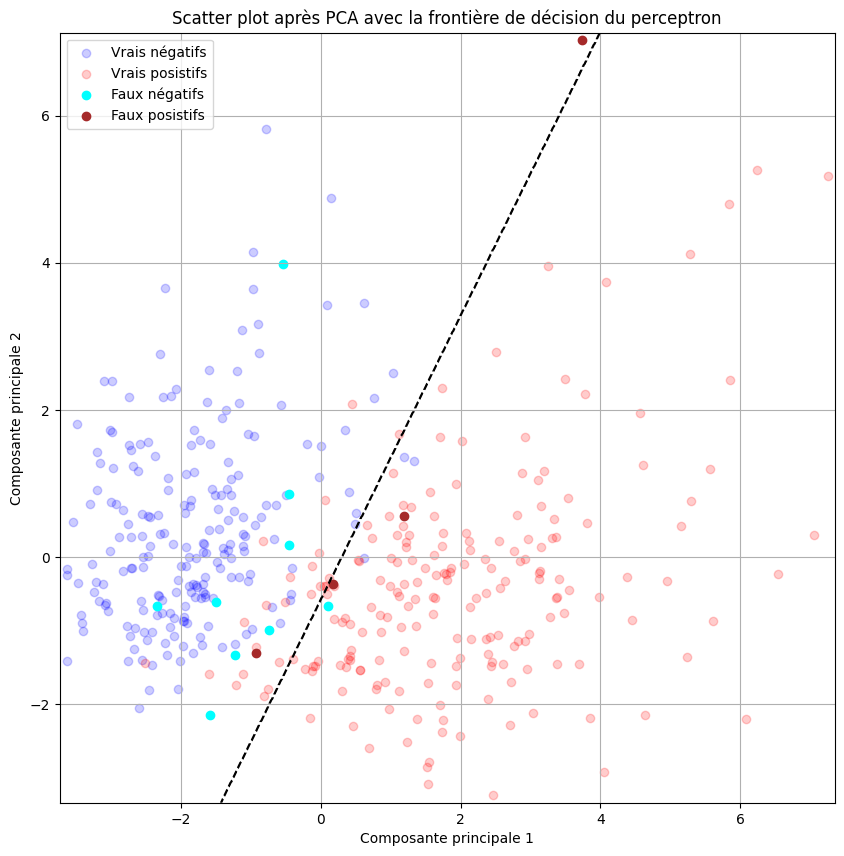

In [101]:
plt.figure(figsize=(10, 10))
plt.scatter(tn[:, 0], tn[:, 1], color='blue', label='Vrais négatifs', alpha=0.2)
plt.scatter(tp[:, 0], tp[:, 1], color='red', label='Vrais posistifs', alpha=0.2)
plt.scatter(fn[:, 0], fn[:, 1], color='cyan', label='Faux négatifs', alpha=1)
plt.scatter(fp[:, 0], fp[:, 1], color='brown', label='Faux posistifs', alpha=1)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Scatter plot après PCA avec la frontière de décision du perceptron')
plt.legend(loc='upper left')
plt.grid()
plt.contour(xx, yy, z, levels=[0], colors='k', linestyles='dashed')
plt.show()


## Application à l'ensemble des données

### Chargement des features sélectionnées

In [102]:
df = pd.read_csv("bcw_data.csv",usecols=df.columns)

In [103]:
df["diagnosis"] = df["diagnosis"].map(lambda x: 1 if x == "M" else 0)

In [104]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

### Normalisation des données

In [105]:
X_scaled = scaler.transform(X)

### Prédictions

In [106]:
y_pred = perceptron.predict(X_scaled)

### Scores sur l'ensemble des données

In [107]:
print(f"Accuracy  : {round(100*accuracy_score(y_pred,y),2)}%")
print(f"Precision : {round(100*precision_score(y_pred,y),2)}%")
print(f"Recall    : {round(100*recall_score(y_pred,y),2)}%")
print(f"F1-Score  : {round(100*f1_score(y_pred,y),2)}%")

Accuracy  : 92.62%
Precision : 99.06%
Recall    : 84.0%
F1-Score  : 90.91%
